# 회귀 모델
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [2]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [5]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [6]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


## 데이터 특성

In [7]:
x = df.Height.values
y = df.Weight.values

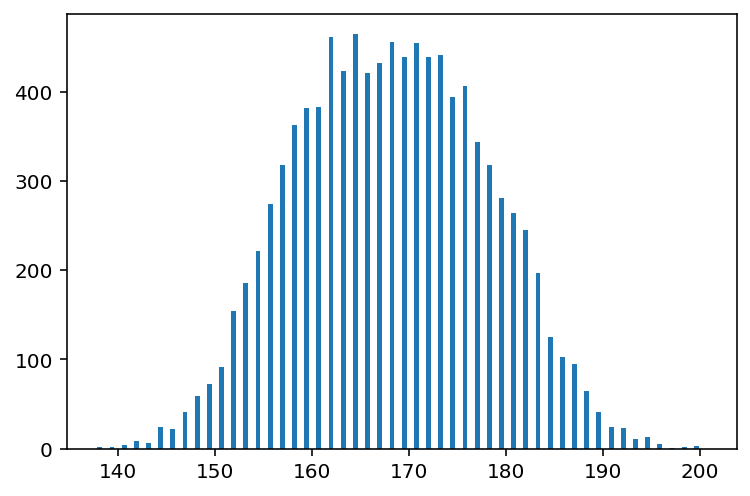

In [8]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [9]:
x.max()

200.65680555982956

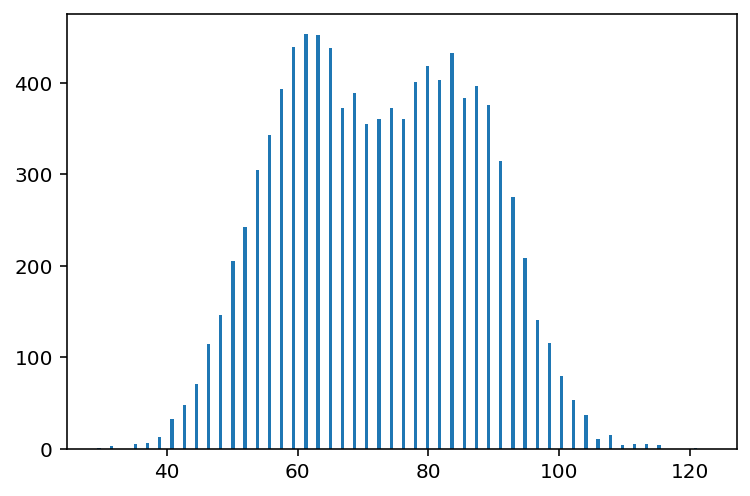

In [10]:
plt.hist(y, bins=50, width=0.5)
plt.show()

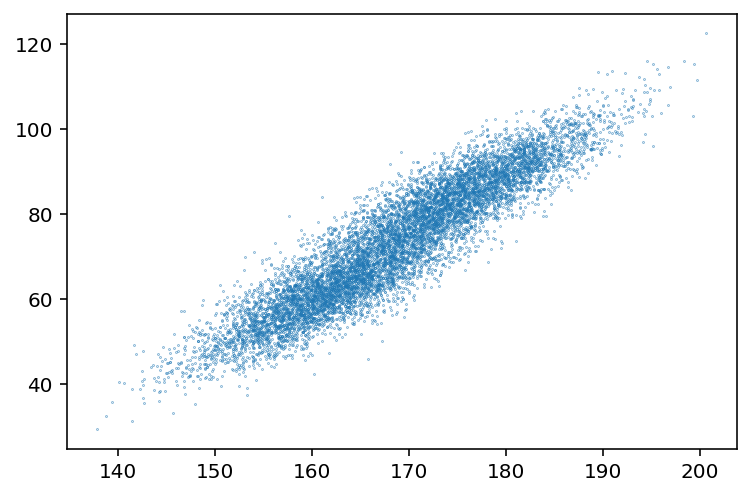

In [11]:
plt.scatter(x,y, s=0.05)

# 키로부터 몸무게 예측
- 성별 정보는 사용하지 않음. 즉, 남여를 구분하지 않는다

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=99)

In [13]:
# 학습 및 검증 데이터 크기 확인
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [14]:
# 모델 생성, 학습, 사용 후 성능 보기 (R-Squared)
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 생성, 생성자
model.fit(x_train.reshape(-1,1), y_train) # (2) 학습
model.score(x_test.reshape(-1,1), y_test) # (3) 이용, 성능평가, R-squared

0.8436572242287994

In [143]:
# 남성과 여성을 구분해서 키-몸무게 스캐터 플롯 그리기,  x, y 를 대상으로
# 데이터 탐색, 시각화

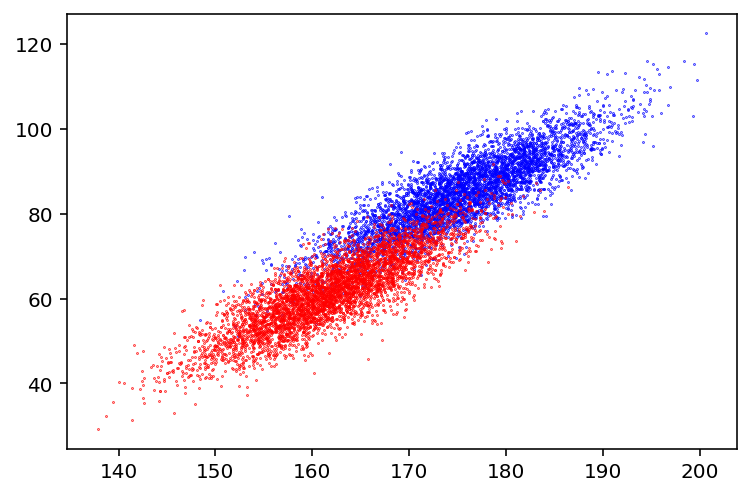

In [16]:
male = df[df.Gender == "Male"]
plt.scatter(male.Height, male.Weight, s=0.1, c='b')
# plt.show()
female = df[df.Gender == "Female"]
plt.scatter(female.Height, female.Weight, s=0.1, c='r')

In [145]:
# 객체 멤버 변수, 멤버 메소드(함수) tap키 사용

In [17]:
# 학습한 계수(파라미터)
a, b = model.coef_, model.intercept_
a, b

(array([1.38193709]), -159.70280451650848)

In [23]:
x_train

array([173.08206529, 162.43659814, 165.93143524, ..., 151.16728266,
       169.70197646, 158.72226405])

In [24]:
np.corrcoef(x_train, y_train)

array([[1.        , 0.92674958],
       [0.92674958, 1.        ]])

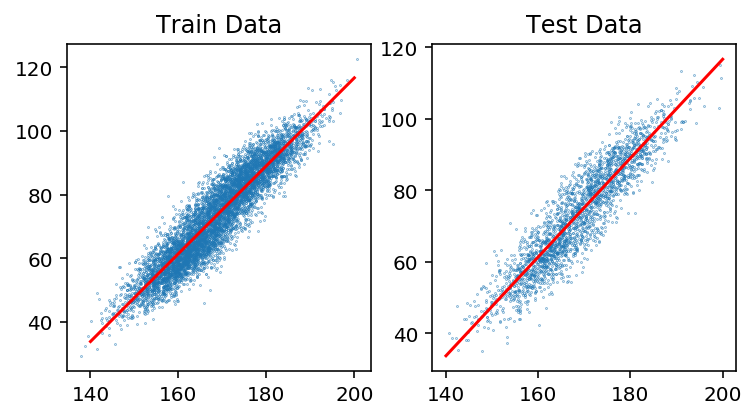

In [25]:
# 훈련과 검증 데이터에 대한 회귀 직선 보기
plt.figure(figsize=(6,3))
xs = np.linspace(140,200,2)
ys = a*xs + b

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_train,y_train, s=0.05)

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(x_test,y_test, s=0.05)

## 남여 구분 정보 사용
- 추가정보를 사용함으로써 (즉, 입력 데이터의 컬럼 수를 늘임으로써) 성능이 개선되는지 확인

In [26]:
df[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [27]:
# Gender 컬럼의 값 확인
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df_sex = pd.get_dummies(df.Gender)
df_sex

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


In [29]:
sex = df.Gender.map({'Male':1, 'Female':0})
# 다른 방법 sex = df.Gender.apply(lambda x: 0 if x=="Male" else 1)
df.Gender = sex
df[:3]

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550


In [31]:
df_all = pd.concat((df, df_sex), axis=1)
df_all[:3]

,Gender,Height,Weight,Female,Male
0,1,187.571423,109.720985,0,1
1,1,174.706036,73.622732,0,1
2,1,188.239668,96.497550,0,1


## 키만 사용한 경우 (복습)
- 몸무게를 예측하는데 키만 사용하고 성별 정보는 사용하지 않는 경우
- 성능 평가는 R-Squared 값 보기

In [32]:
x = df.Height.values
y = df.Weight.values

# np.random.seed(99)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99)
model = LinearRegression() # (1) 모델 생성
model.fit(x_train.reshape(-1,1), y_train)
model.score(x_test.reshape(-1,1), y_test)

0.8436572242287994

# 성별과 키, 두개의 컬럼을 사용
- 남여의 키-몸무게 관계가 다르므로 추가 정보 사용으로 성능이 개선될 것으로 예상
- 2차원 배열 구조를 가지므로 소문자 x 대시 대문자 X를 사용한다
 - 2차원 배열을 사용하므로 reshape(-1,1)이 필요 없다

In [33]:
df_all[:3]

,Gender,Height,Weight,Female,Male
0,1,187.571423,109.720985,0,1
1,1,174.706036,73.622732,0,1
2,1,188.239668,96.497550,0,1


In [34]:
X1 = df_all[["Gender", "Height"]]
y = df.Weight.values

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=999)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8937654209432832

In [160]:
# 현재는 남성 0, 여성 1로 코딩했음
# (1) 남성을 1로 여성을 0으로 인코딩하면? 결과가 달라지나? 컬럼을 하나 사용 -> 결과는 같음!
# (2) (비교) get_dummies()를 사용하여 원핫 인코딩을 하면 결과가 달라지나? 컬럼을 두개 사용 (남, 여 컬럼 두개 사용)

In [37]:
X2 = df_all[["Height", "Female", "Male"]]
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=999)
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8937654209432832

- 성별 정보를 추가로 사용하여 성능이 개선되었다

## 다중 회귀 모델
- 입력 변수가 2개인 다중회귀 모델이므로 파라미터가 변수의 수만큼 자동으로 2개 만들어진다
- $\hat{y} = b +a_{1}x_{1} + a_{2}x_{2}$
- $x_{1}$: 성별, $x_{2}$: 키

In [38]:
X2[:3] # 원핫 인코딩

,Height,Female,Male
0,187.571423,0,1
1,174.706036,0,1
2,188.239668,0,1


In [39]:
print(model.coef_)
print(model.intercept_)

[ 1.063143  -4.4888992  4.4888992]
-105.97140793848892


In [40]:
a1, a2, a3 = model.coef_[0], model.coef_[1], model.coef_[2]
b1 = model.intercept_

In [42]:
a1, a2, a3, b1

(1.0631429979268292,
 -4.488899196752524,
 4.488899196752523,
 -105.97140793848892)

## 회귀직선
- (1)남성의 경우 회귀 직선 (Gender=0, 갈색 점): 파란색 선
- (2)여성의 경우 회귀 직선 (Gender=1, 노란색 점): 붉은색 선
- (3)성별을 구분하지 않는 전체 대상의 회귀직선: 검정색

In [44]:
X_train[:3]

,Height,Female,Male
9718,164.191234,1,0
527,175.409567,0,1
3489,180.045636,0,1


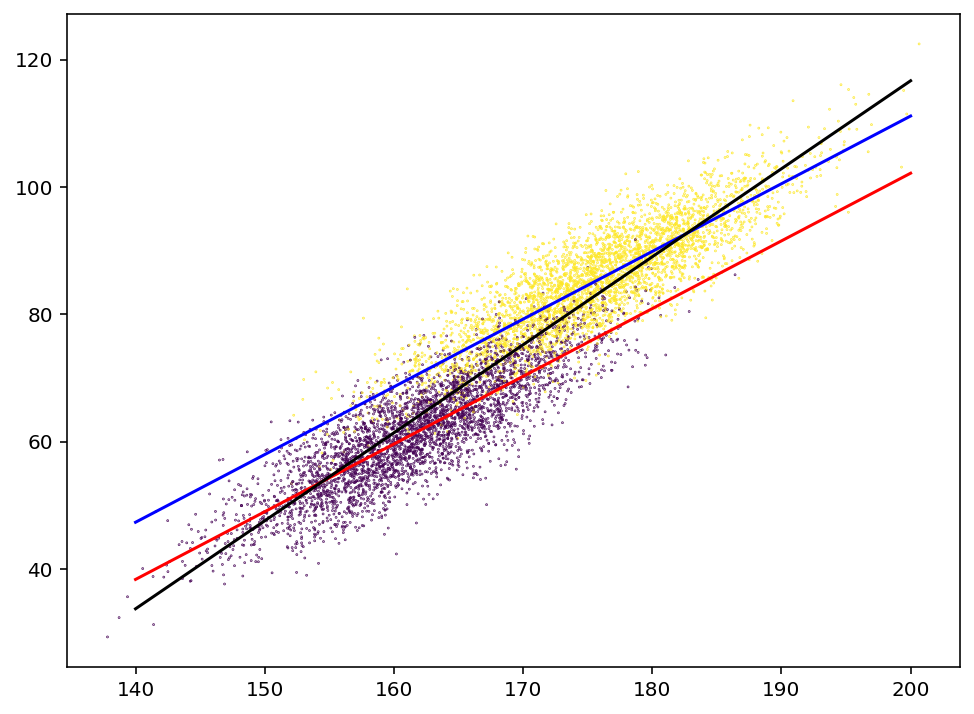

In [45]:
xs = np.linspace(140,200,2)
plt.figure(figsize=(8,6))
plt.scatter(X_train.Height, y_train, c=X_train.Male, s=0.1)

# 남성의 경우 회귀 직선 (Female, Male)
ys = a1*xs + 0*a2 + 1*a3 + b1
plt.plot(xs, ys, c='b')

# 여성의 경우 회귀 직선 
ys = a1*xs + 1*a2 + 0*a3 + b1
plt.plot(xs, ys, c='r')

# 남여 구분 없는 경우 회귀 직선 (a, b 파라미터 사용)
ys = a*xs + b
plt.plot(xs, ys, c='k')

- 다른 카테고리 변수 추가

In [168]:
df["Nation"] = np.random.choice(["China","Korea","Japan"], 10000)
df[:10]

,Gender,Height,Weight,Nation
0,1,187.571423,109.720985,Japan
1,1,174.706036,73.622732,Korea
2,1,188.239668,96.497550,Japan
3,1,182.196685,99.809504,China
4,1,177.499761,93.598619,Korea
5,1,170.822660,69.042216,Korea
6,1,174.714106,83.428219,Korea
7,1,173.605229,76.190352,Korea
8,1,170.228132,79.800187,Japan
9,1,161.179495,70.941642,Korea


In [169]:
df.Nation.value_counts()

Korea    3390
Japan    3356
China    3254
Name: Nation, dtype: int64

In [170]:
df_nat = pd.get_dummies(df["Nation"])
df_nat[:3]

,China,Japan,Korea
0,0,1,0
1,0,0,1
2,0,1,0


In [172]:
df = df.join(df_nat)
df[:3]

,Gender,Height,Weight,Nation,China,Japan,Korea
0,1,187.571423,109.720985,Japan,0,1,0
1,1,174.706036,73.622732,Korea,0,0,1
2,1,188.239668,96.497550,Japan,0,1,0


In [173]:
data[:3]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550


In [174]:
pd.get_dummies(data.Gender)

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


## 기타 성능 평가
- MAE, RMSE 값은 각각 mean_absolute_error, mean_squared_error 함수가 제공한다

In [59]:
X_test[:3]

,Height,Female,Male
9031,164.800625,1,0
3462,173.810606,0,1
3863,184.549807,0,1


In [68]:
y_pred = model.predict(X_test) # 검증 데이터 2500개 모두에 대한 예측값 구하기
# 학습 fit(), 점수(R-score) score(), 실제 예측에 사용, predict()

In [65]:
sample_data = [[190, 1, 0],
               [190, 0, 1],
               [160, 1, 0],
               [160, 0, 1]]

In [66]:
model.predict(sample_data)

array([ 91.53686247, 100.51466086,  59.64257253,  68.62037093])

In [50]:
y_pred.shape

(2500,)

In [69]:
# MAE 참고로 오차 크기를 보기
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_pred)

3.738635615078296

In [70]:
# RMSE 를 얻으려면 squared=False 를 설정한다
# mean_squared_error(y_test, y_pred, squared=False)
mean_squared_error(y_test, y_pred)

21.971919615306177

In [71]:
mean_squared_error(y_test, y_pred, squared=False)

4.6874214249740955

In [180]:
error = y_pred-y_test # 예측치 - 실제값
error.max()

19.969934731875078

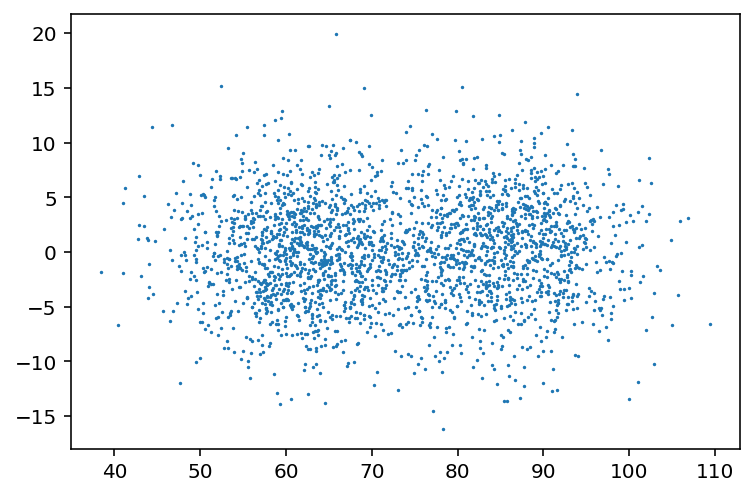

In [181]:
# 실습: residue plot (+, -를 그대로 반영해서 그리기)
plt.scatter(y_pred, error, s=0.5)